In [20]:
# read parquet file
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [21]:
df = pd.read_parquet("../data/vehicle_reg_dosm/cars_2018-2025_cleaned.parquet")
print(df.shape)
print(df['maker'].unique())

(4862776, 8)
['BMW' 'Ford' 'Honda' 'Mazda' 'Mercedes Benz' 'Mitsubishi' 'Perodua'
 'Toyota' 'Volkswagen' 'Audi' 'Foton' 'Hyundai' 'Isuzu' 'Land Rover'
 'Mini' 'Nissan' 'Porsche' 'Proton' 'Renault' 'Subaru' 'Volvo' 'Chery'
 'Daihatsu' 'Jaguar' 'Tata' 'Infiniti' 'BYD' 'Peugeot' 'Kia' 'GAC' 'Xpeng'
 'JMC']


In [22]:
def classify_brand(brand):
    if brand in ['BMW', 'Mercedes Benz', 'Audi', 'Jaguar', 'Land Rover', 'Volvo', 'Porsche', 'Infiniti', 'Mini']:
        return 'Luxury'
    elif brand in ['Honda', 'Toyota', 'Nissan', 'Mazda', 'Hyundai', 'Kia', 'Ford', 'Mitsubishi', 'Peugeot']:
        return 'Mass Market'
    elif brand in ['Proton', 'Perodua']:
        return 'National'
    elif brand in ['BYD', 'Chery', 'Xpeng', 'GAC', 'JMC']:
        return 'New Entrant / EV'
    elif brand in ['Isuzu', 'Tata', 'Foton']:
        return 'Commercial'
    else:
        return 'Other'

df['Segment'] = df['maker'].apply(classify_brand)
df


,date_reg,type,maker,model,colour,fuel,state,company,Segment
0,2018-01-01,jip,BMW,X5,white,petrol,Rakan Niaga,Sime Darby Berhad,Luxury
1,2018-01-01,pick_up,Ford,Ranger,white,greendiesel,Kelantan,Sime Darby Berhad,Mass Market
2,2018-01-01,pick_up,Ford,Ranger,black,greendiesel,Kelantan,Sime Darby Berhad,Mass Market
3,2018-01-01,jip,Honda,CR-V,green,petrol,Rakan Niaga,DRB-HICOM Berhad,Mass Market
4,2018-01-01,jip,Honda,CR-V,grey,petrol,Rakan Niaga,DRB-HICOM Berhad,Mass Market
...,...,...,...,...,...,...,...,...,...
4862771,2025-03-31,motokar,Proton,Saga,white,petrol,Rakan Niaga,DRB-HICOM Berhad,National
4862772,2025-03-31,jip,Proton,X50,grey,petrol,Rakan Niaga,DRB-HICOM Berhad,National
4862773,2025-03-31,jip,Proton,X70,blue,petrol,Rakan Niaga,DRB-HICOM Berhad,National
4862774,2025-03-31,jip,Toyota,Corolla Cross,blue,petrol,Rakan Niaga,Sime UMW Holdings Berhad,Mass Market


Group data by month and Segment

In [23]:
# Group date_reg by month and segment
df['date_reg'] = pd.to_datetime(df['date_reg'])
df['month'] = df['date_reg'].dt.to_period('M')
df_grouped = df.groupby(['month', 'Segment']).size().reset_index(name='count')
df_grouped

,month,Segment,count
0,2018-01,Commercial,436
1,2018-01,Luxury,2592
2,2018-01,Mass Market,19941
3,2018-01,National,22476
4,2018-01,New Entrant / EV,1
...,...,...,...
478,2025-03,Luxury,2379
479,2025-03,Mass Market,23995
480,2025-03,National,43935
481,2025-03,New Entrant / EV,3839


In [24]:
macro_data_df = pd.read_csv("../data/macro_data_merged.csv")
macro_data_df

,date,subclass,cars_cpi,subclass name,opr,lf,lf_employed,lf_unemployed,lf_outside,p_rate,ep_ratio,u_rate
0,2018-01-01,7111,98.5,Cars,3.00,15187.0,14670.5,516.5,7074.8,68.2,65.9,3.4
1,2018-02-01,7111,98.5,Cars,3.25,15230.0,14721.5,508.5,7112.3,68.2,65.9,3.3
2,2018-03-01,7111,98.5,Cars,3.25,15241.2,14732.5,508.7,7115.0,68.2,65.9,3.3
3,2018-04-01,7111,98.5,Cars,3.25,15313.1,14803.1,510.0,7130.9,68.2,66.0,3.3
4,2018-05-01,7111,98.5,Cars,3.25,15357.5,14852.6,504.8,7097.1,68.4,66.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...
82,2024-11-01,7111,94.8,Cars,3.00,17293.8,16747.0,546.7,7226.7,70.5,68.3,3.2
83,2024-12-01,7111,94.7,Cars,3.00,17168.4,16629.9,538.5,7156.8,70.6,68.4,3.1
84,2025-01-01,7111,95.9,Cars,3.00,17218.2,16684.4,533.8,7154.8,70.6,68.5,3.1
85,2025-02-01,7111,96.8,Cars,3.00,17266.9,16734.1,532.8,7153.1,70.7,68.5,3.1


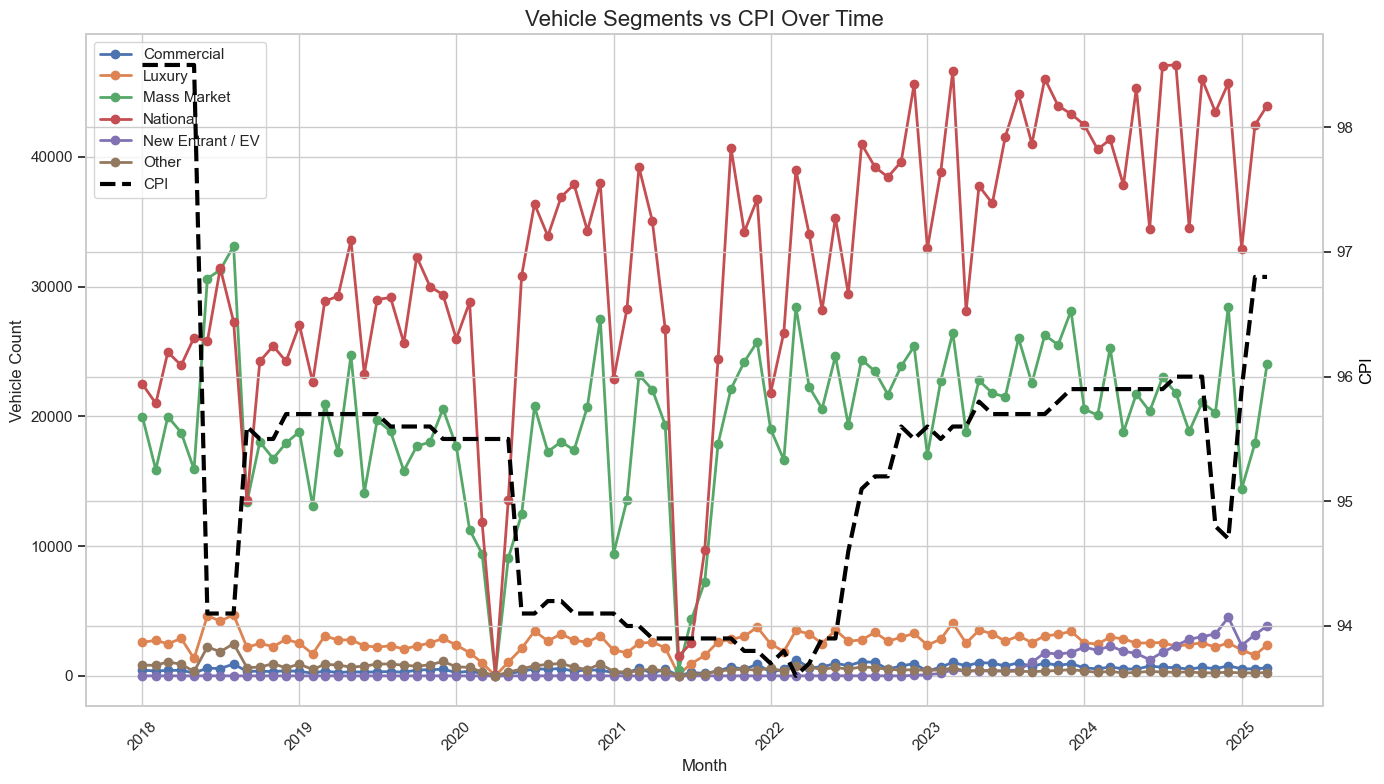

In [ ]:
# plot graph cpi vs segment

# Convert month to datetime for proper plotting and merging
df_grouped['month_str'] = df_grouped['month'].astype(str)
df_grouped['month_date'] = pd.to_datetime(df_grouped['month_str'])

# Convert macro data date to datetime 
macro_data_df['date'] = pd.to_datetime(macro_data_df['date'])

# Create a pivot table to have segments as columns
pivot_df = df_grouped.pivot_table(index='month_date', columns='Segment', values='count', fill_value=0)

# Merge with CPI data
# Assuming 'Date' is the date column in macro_data_df and 'CPI' is the CPI column
merged_df = pd.merge_asof(
    pivot_df.reset_index().sort_values('month_date'),
    macro_data_df[['date', 'cars_cpi']].sort_values('date'),
    left_on='month_date',
    right_on='date',
    direction='nearest'
)

# Set up the figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot segment counts
for segment in pivot_df.columns:
    ax1.plot(merged_df['month_date'], merged_df[segment], marker='o', linewidth=2, label=segment)

ax1.set_xlabel('Month')
ax1.set_ylabel('Vehicle Count')
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis for CPI
ax2 = ax1.twinx()
ax2.plot(merged_df['month_date'], merged_df['cars_cpi'], color='black', linestyle='--', linewidth=3, label='CPI')
ax2.set_ylabel('CPI', color='black')

# Add title and legend
plt.title('Vehicle Segments vs CPI Over Time', fontsize=16)
fig.tight_layout()

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


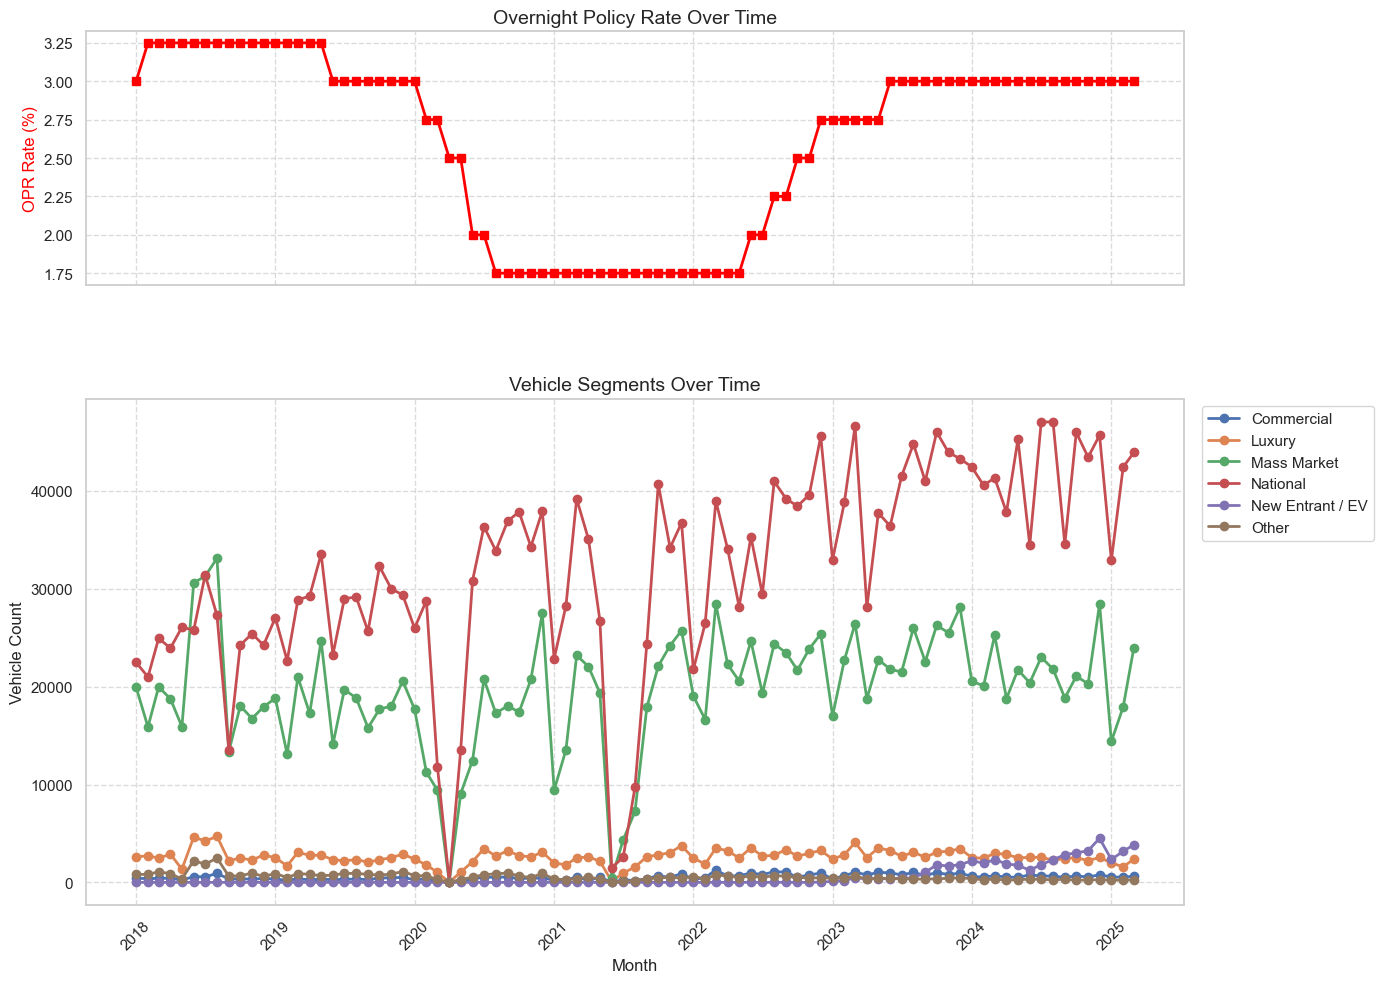

In [32]:
# Convert month to datetime for proper plotting and merging
df_grouped['month_str'] = df_grouped['month'].astype(str)
df_grouped['month_date'] = pd.to_datetime(df_grouped['month_str'])

# Convert macro data date to datetime 
macro_data_df['date'] = pd.to_datetime(macro_data_df['date'])

# Create a pivot table to have segments as columns
pivot_df = df_grouped.pivot_table(index='month_date', columns='Segment', values='count', fill_value=0)

# Merge with OPR data
merged_df = pd.merge_asof(
    pivot_df.reset_index().sort_values('month_date'),
    macro_data_df[['date', 'opr']].sort_values('date'),
    left_on='month_date',
    right_on='date',
    direction='nearest'
)

# Create vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

# Plot OPR on top subplot
ax1.plot(merged_df['month_date'], merged_df['opr'], color='red', linewidth=2, marker='s')
ax1.set_ylabel('OPR Rate (%)', color='red', fontsize=12)
ax1.set_title('Overnight Policy Rate Over Time', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot segment counts on bottom subplot
for segment in pivot_df.columns:
    ax2.plot(merged_df['month_date'], merged_df[segment], marker='o', linewidth=2, label=segment)

ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Vehicle Count', fontsize=12)
ax2.set_title('Vehicle Segments Over Time', fontsize=14)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper left', bbox_to_anchor=(1.01, 1.0))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)  # Add some space between the subplots
plt.show()

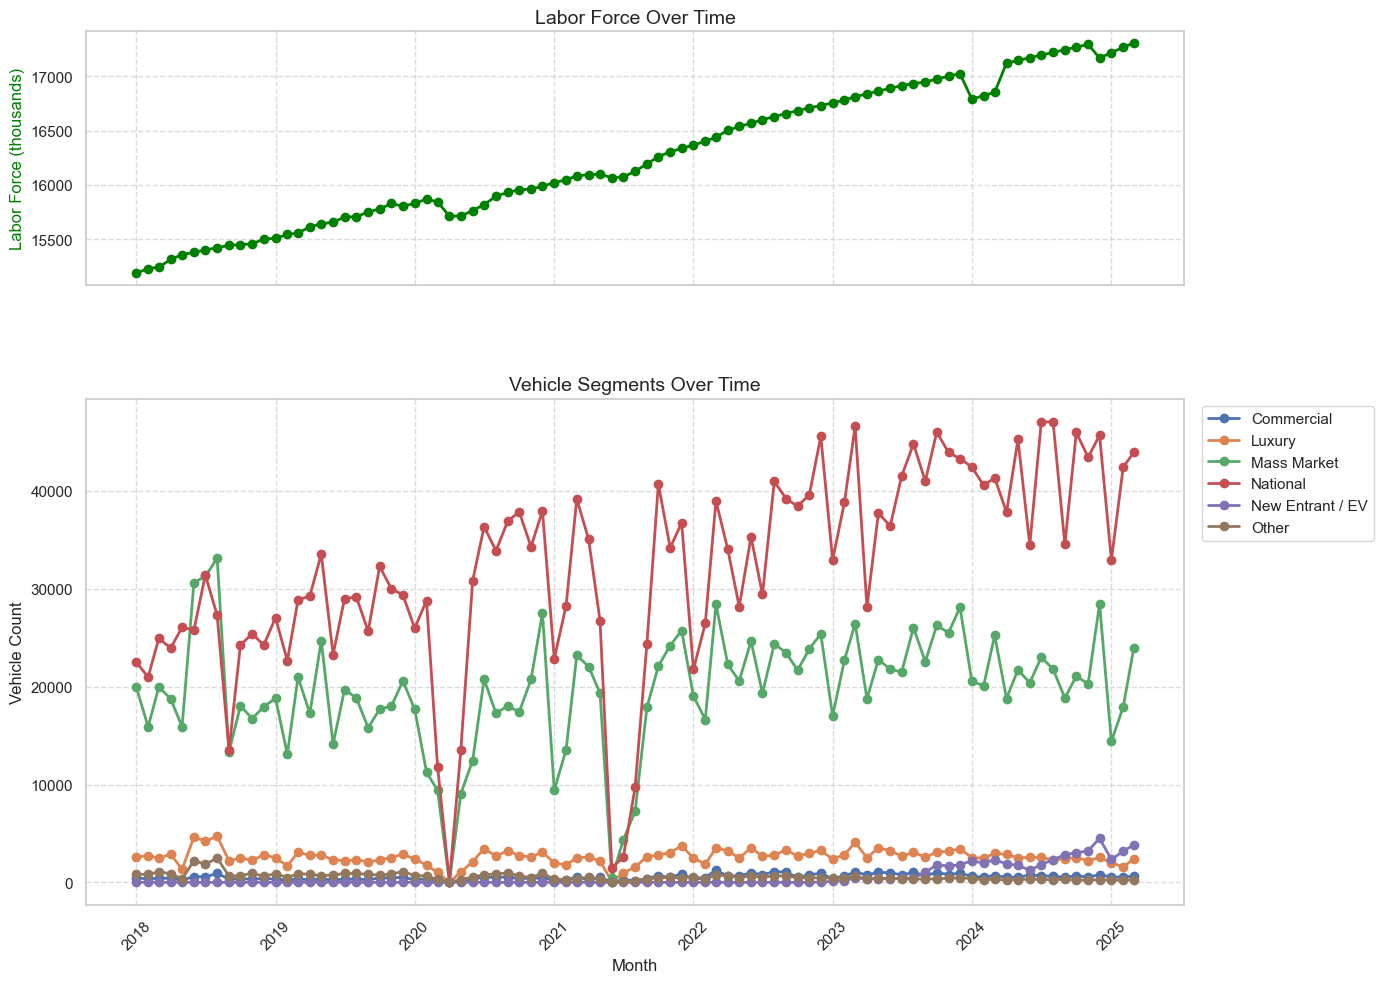

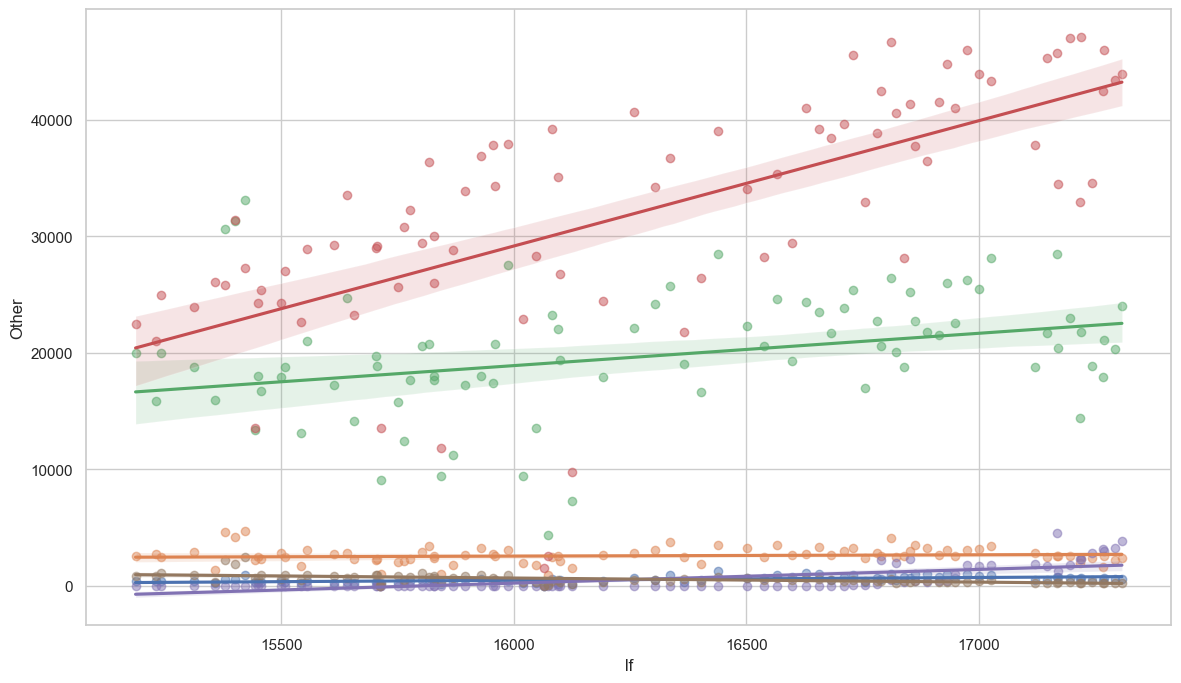

In [37]:
# plot labor force vs segment

# Convert month to datetime for proper plotting and merging
df_grouped['month_str'] = df_grouped['month'].astype(str)
df_grouped['month_date'] = pd.to_datetime(df_grouped['month_str'])

# Convert macro data date to datetime 
macro_data_df['date'] = pd.to_datetime(macro_data_df['date'])

# Create a pivot table to have segments as columns
pivot_df = df_grouped.pivot_table(index='month_date', columns='Segment', values='count', fill_value=0)

# Merge with labor force data
merged_df = pd.merge_asof(
    pivot_df.reset_index().sort_values('month_date'),
    macro_data_df[['date', 'lf']].sort_values('date'),
    left_on='month_date',
    right_on='date',
    direction='nearest'
)

# Create vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

# Plot labor force on top subplot
ax1.plot(merged_df['month_date'], merged_df['lf'], color='green', linewidth=2, marker='o')
ax1.set_ylabel('Labor Force (thousands)', color='green', fontsize=12)
ax1.set_title('Labor Force Over Time', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot segment counts on bottom subplot
for segment in pivot_df.columns:
    ax2.plot(merged_df['month_date'], merged_df[segment], marker='o', linewidth=2, label=segment)

ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Vehicle Count', fontsize=12)
ax2.set_title('Vehicle Segments Over Time', fontsize=14)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper left', bbox_to_anchor=(1.01, 1.0))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)  # Add some space between the subplots
plt.show()

# Additional plot: Correlation between labor force and different segments
plt.figure(figsize=(14, 8))
for segment in pivot_df.columns:
    sns.regplot(x=merged_df['lf'], y=merged_df[segment], label=segment, scatter_kws={'alpha':0.5})
